# Matplotlib の練習  

## Matplotlib とは  

> Matplotlibは、プログラミング言語Pythonおよびその科学計算用ライブラリNumPyのためのグラフ描画ライブラリである。オブジェクト指向のAPIを提供しており、様々な種類のグラフを描画する能力を持つ。([Wikipedia](https://ja.wikipedia.org/wiki/Matplotlib)より)  

In [1]:
# モジュールのインポート
import matplotlib.pyplot as plt

# matplotlib を Jupyter Notebook で使うときのおまじない
%matplotlib inline  

# NumPy と pandasも使用するのでついでにインポートする
import numpy as np  
import pandas as pd

下の表のような種類のグラフを、対応する関数を使って描画します。  

|種類|描画関数|
|:-:|:-:|
|折れ線グラフ|`plot()`|
|散布図|`scatter()`|
|ヒストグラム|`hist()`|
|棒グラフ|`bar()`|
|円グラフ|`pie()`|
|箱ひげ図|`boxplot()`|

## 折れ線グラフと散布図の描画  

基本の折れ線グラフと散布図から描画してみます。折れ線グラフには `plt.plot()` を、散布図には `plt.scatter()` を使います。  

- [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)  
- [matplotlib.pyplot.scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  

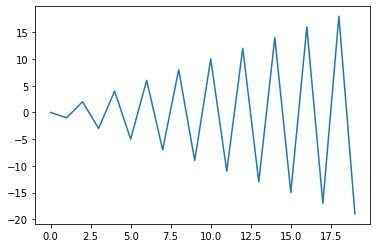

In [2]:
# x, y の座標を配列 (numpy.ndarray) として用意する
x = np.array(range(20))
y = np.array([i if i%2==0 else -i for i in x])

# x, y 座標を元にグラフを生成する
plt.plot(x, y)

# 生成したグラフを描画する
plt.show()

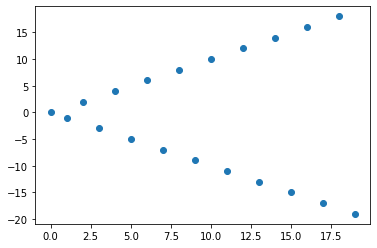

In [3]:
# 散布図の場合
plt.scatter(x, y)
plt.show()

なお、上の例の `x` と `y` は NumPy の ndarray ではなくリストなどを用いても構いません。  

### 曲線の描画と各種描画設定


設定対象|キーワード引数|説明
:-:|:-:|-
凡例|`label`|「凡例」を文字列で与える。`False` を与えると凡例を表示しない。  
線の色|`c`, <br>`color`|描画色を指定する。次の文字列が指定できる。`"red"`, `"green"`, `"blue"`, `"cyan"`, `"magenta"`, `"yellow"`, `"black"`, `"white"`<br>また、それぞれの色の頭文字でも良い。`"r"`, `"g"`, `"b"`, `"c"`, `"m"`, `"y"`, `"k"`, `"w"`<br>この他にもカラーマップを用いた方法もある。
線の太さ|`lw`, <br>`linewidth`|描画の線の太さを与える。単位はポイント
線のスタイル|`ls`, <br>`linestyle`|線のスタイルを次のような文字列で与える。`"-"` (実線: デフォルト) , `"--"` (破線) , `":"` (点線) , `"-."` (一点鎖線)  他にもあり 
マーカーの種類|`marker`|マーカーの種類を次のような文字列で与える。<br>`"."` (ドット) , `"o"` (丸) , `"s"` (■) , `"*"` (星) , `"^"` (三角形) , `"v"` (逆三角形) , `">"` (右向き三角形) , `"<"` (左向き三角形)  その他多数 
マーカーのサイズ|`ms`, <br>`markersize`|マーカーのサイズを数値で与える。単位はポイント　
$\alpha$ 値|`alpha`|透明度を  $0 \leq \alpha \leq 1$  の範囲で指定する。大きいほど濃い。

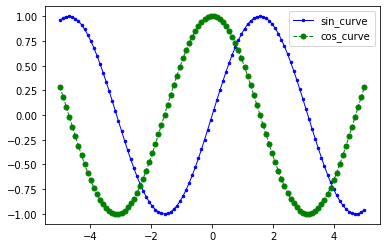

In [4]:
x = np.linspace(-5, 5, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

# plt.plot() でグラフの描画と設定を行う。
plt.plot(x, y_sin, label="sin_curve", c="b", lw=1, ls="-", marker=".", ms=5, alpha=1)
plt.plot(x, y_cos, label="cos_curve", c="g", lw=1, ls="--", marker="o", markersize=5, alpha=1)

# 凡例の生成
plt.legend()

plt.show()

次に、上の表に正接 (タンジェント) 関数のグラフを追加してみます。  

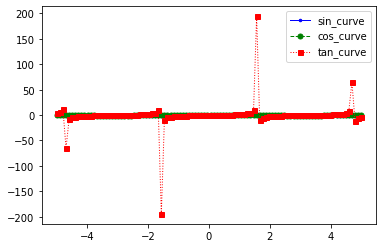

In [5]:
y_tan = np.tan(x)
plt.plot(x, y_sin, label="sin_curve", c="b", lw=1, ls="-", marker=".", markersize=5, alpha=1)
plt.plot(x, y_cos, label="cos_curve", c="g", lw=1, ls="--", marker="o", markersize=5, alpha=1)
plt.plot(x, y_tan, label="tan_curve", c="r", lw=1, ls=":", marker="s", markersize=5, alpha=1)
plt.legend()
plt.show()

グラフの y 座標のスケールを制限しないと見づらいため、上下限を指定します。  

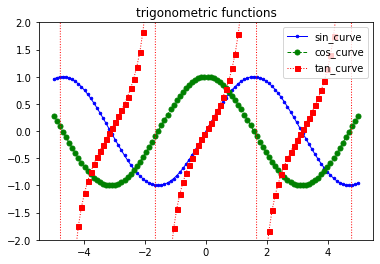

In [6]:
plt.plot(x, y_sin, label="sin_curve", c="b", lw=1, ls="-", marker=".", markersize=5, alpha=1)
plt.plot(x, y_cos, label="cos_curve", c="g", lw=1, ls="--", marker="o", markersize=5, alpha=1)
plt.plot(x, y_tan, label="tan_curve", c="r", lw=1, ls=":", marker="s", markersize=5, alpha=1)
plt.legend()

# y軸の上下限を指定
plt.ylim(-2, 2)

# グラフタイトルを指定
plt.title("trigonometric functions")

plt.show()

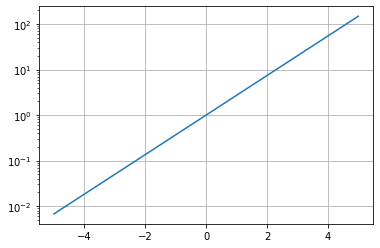

In [7]:
# 対数目盛にする。
y = np.e**x

plt.plot(x, y)

plt.yscale("log")  
plt.grid()

plt.show()

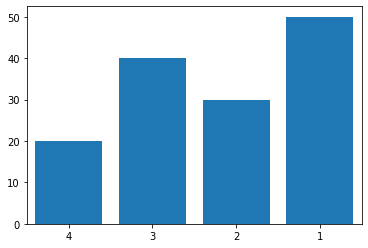

In [8]:
# 軸を反転する。
data = {1: 50, 2:30, 3: 40, 4: 20}
plt.bar(data.keys(), data.values())

plt.xticks(list(data.keys()))
plt.xlim(4.5, 0.5)
plt.show()

## ヒストグラムの描画  

- [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)  

In [9]:
# サンプルデータの読み込み
df_sample_housing = pd.read_csv("./練習用データ/cadata.csv")
df_sample_housing.describe()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


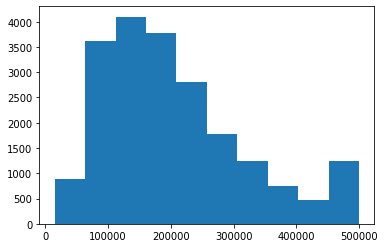

In [10]:
# ヒストグラムの描画
plt.hist(df_sample_housing["median_house_value"])
plt.show()

名前付き引数 `bins=` に正の整数を渡すことで、ヒストグラムの階級幅 (ビン/bin) を指定することができる。  

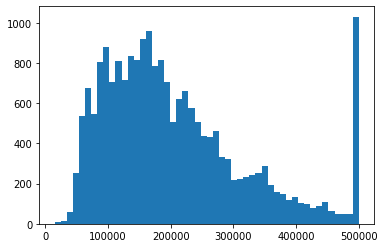

In [11]:
# 全体を 50 の階級に分ける。
plt.hist(df_sample_housing["median_house_value"], bins=50)
plt.show()

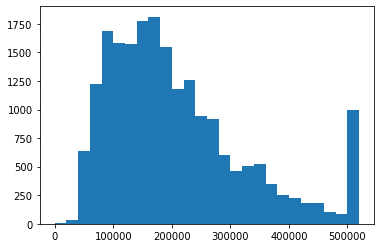

In [12]:
# 階級幅を 20000 にする。
r_max = int(df_sample_housing["median_house_value"].max())
r_width = 20000
plt.hist(df_sample_housing["median_house_value"], bins=range(0, r_max+r_width, r_width))
plt.show()

## 棒グラフの描画  

- [matplotlib.pyplot.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)  
- [matplotlib.pyplot.barh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)  

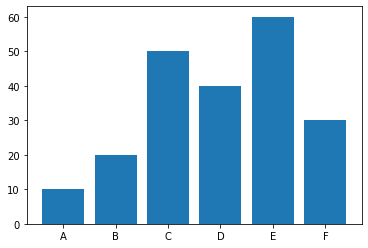

In [13]:
x_labels = ["A", "B", "C", "D", "E", "F"]
height = [10, 20, 50, 40, 60, 30]

# 棒グラフの描画
plt.bar(range(len(height)), height=height, tick_label=x_labels)
plt.show()

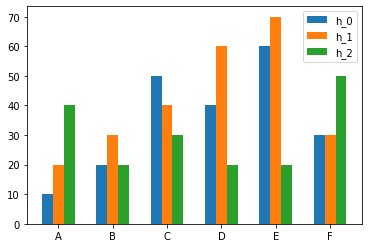

In [14]:
x_labels = ["A", "B", "C", "D", "E", "F"]
heights = {"h_0": [10, 20, 50, 40, 60, 30],
           "h_1": [20, 30, 40, 60, 70, 30], 
           "h_2": [40, 20, 30, 20, 20, 50]}
width = 0.2
i = -1
for h in heights:
    x = np.arange(len(x_labels))+i*width
    plt.bar(x, height=heights[h], label=h, tick_label=x_labels, width=width)    
    i += 1

plt.legend()
plt.xticks(np.arange(len(x_labels)))
plt.show()

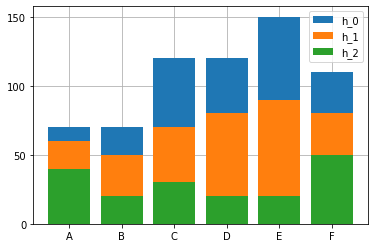

In [15]:
# 積み上げ棒グラフ
df = pd.DataFrame(heights, index=x_labels)

for i, col in enumerate(df.columns):
    plt.bar(df.index, df.loc[:, col], label=col, 
            bottom=df.iloc[:, i+1:].sum(axis=1), zorder=10)
    
plt.legend()
plt.yticks(np.arange(0, max(df.sum(axis=1))+50, 50))
plt.grid(zorder=5)
plt.show()

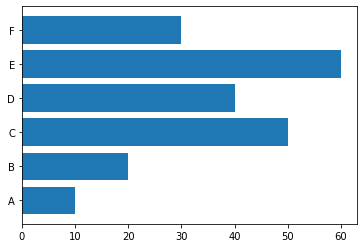

In [16]:
# plt.barh() で水平方向の棒グラフ
plt.barh(np.arange(len(height)), width=height, tick_label=x_labels)
plt.show()

## 円グラフ  

- [matplotlib.pyplot.pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)  

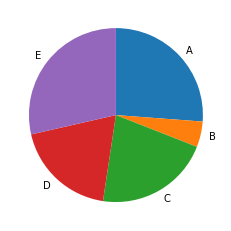

In [17]:
# labels のフォントが背景色と同色の場合は見えないので設定する。
plt.figure(facecolor="w", linewidth=0.5, edgecolor='w')

data = {"A": 55, "B": 10, "C": 45, "D": 40, "E":60}

# 円グラフの描画
plt.pie(data.values(), labels=data.keys(), startangle=90, counterclock=False)
plt.show()

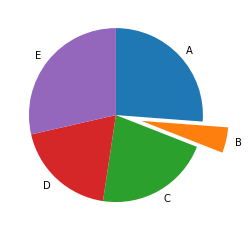

In [18]:
plt.figure(facecolor="w", linewidth=0.5, edgecolor='w')

# explode= に数値のリストを渡すと…
plt.pie(data.values(), explode=[0, 0.3, 0, 0, 0], labels=data.keys(), 
        startangle=90, counterclock=False)
plt.show()

## 箱ひげ図  

- [matplotlib.pyplot.boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)  

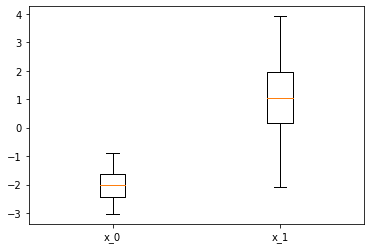

In [19]:
x_0 = np.random.normal(-2, 0.5, 100)
x_1 = np.random.normal(1, 1.3, 100)

# 箱ひげ図の描画
plt.boxplot((x_0, x_1), labels=("x_0", "x_1"))
plt.show()

## pandas.DataFrame (Series) を利用して描画  



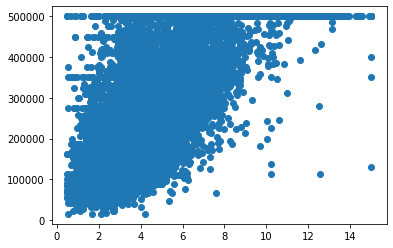

In [20]:
plt.scatter(x=df_sample_housing["median_income"], y=df_sample_housing["median_house_value"])
plt.show()

## スタイル  

- [Style sheets reference](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)  

In [21]:
# スタイルを指定
plt.style.use("ggplot")

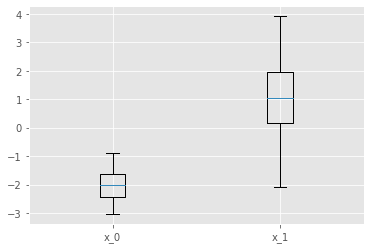

In [22]:
# デフォルトとは異なるスタイルで描画される
plt.boxplot((x_0, x_1), labels=("x_0", "x_1"))
plt.show()

In [23]:
# 利用可能なスタイルの一覧
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

## おまけ  

pandas の DataFrame クラスの持つ `plot()` メソッドから図を直接描画することもできます。  

[pandas.DataFrame.plot ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

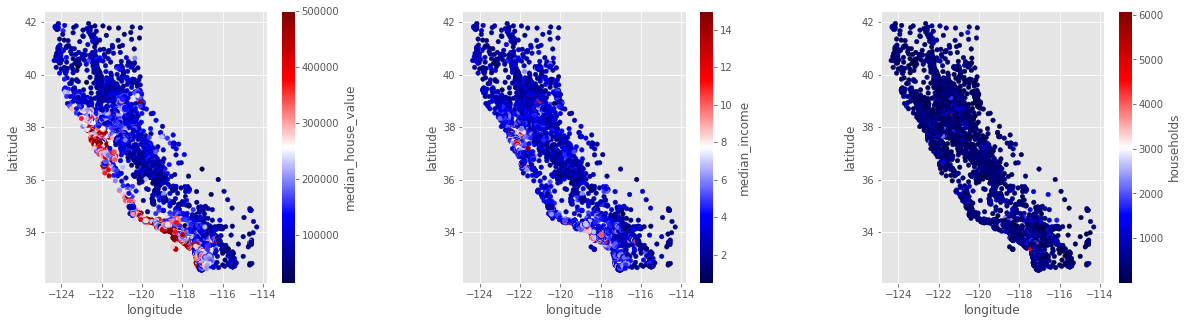

In [24]:
# matplotlib.pyplot の axes に対して、DataFrame のメソッドから図を直接描画

# 作図領域は 1 行 3 列
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# axes 間のスペースを調整
plt.subplots_adjust(wspace=0.5, hspace=0.1)

# matplotlib.pyplot の axes に対して、DataFrame のメソッドから図を直接描画する。
# 散布図を用いて x, y を経緯度でプロットするとカリフォルニア州の地形が見える。
df_sample_housing.plot.scatter(x="longitude", y="latitude", c="median_house_value", cmap="seismic", ax=axes.flatten()[0])
df_sample_housing.plot.scatter(x="longitude", y="latitude", c="median_income", cmap="seismic", ax=axes.flatten()[1])
df_sample_housing.plot.scatter(x="longitude", y="latitude", c="households", cmap="seismic", ax=axes.flatten()[2])

plt.show()

## 補足資料  

この資料による説明は以上です。さらに詳しく知りたい場合は、  

- [Matplotlib: Python plotting](https://matplotlib.org/)  
  - [Overview](https://matplotlib.org/contents.html)
  - [Tutorials](https://matplotlib.org/tutorials/index.html)  
- [12. Matplotlib 入門 — ディープラーニング入門：Chainer チュートリアル](https://tutorials.chainer.org/ja/src/12_Introduction_to_Matplotlib_ja.html)  
- [matplotlibのめっちゃまとめ - Qiita](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)    

などを参照してください。  